In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [10]:
data = load_iris()

In [58]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
y = pd.Series(data.target,name="Target")

data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Creating Few Graph for display

Text(0.5, 1.0, 'Sepal Length vs Width')

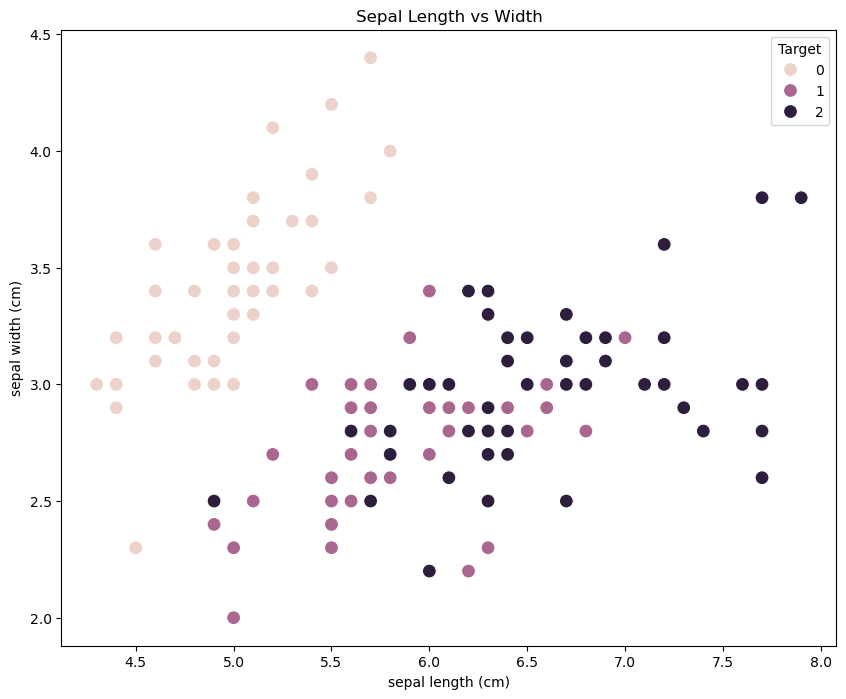

In [50]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='sepal length (cm)',y='sepal width (cm)',hue=y,s=100)
plt.title("Sepal Length vs Width")

Text(0.5, 1.0, 'Sepal Length vs Width')

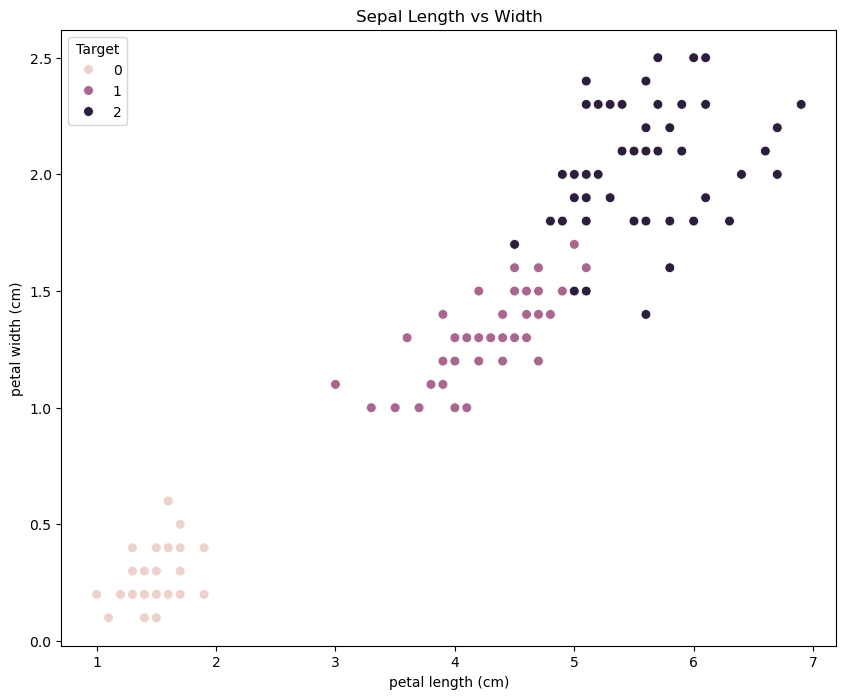

In [60]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='petal length (cm)',y='petal width (cm)',hue=y,s=50)
plt.title("Sepal Length vs Width")

- There is a significent Relation between Petal Length and Petal width. It can easily differenciate betw

<Axes: xlabel='Target'>

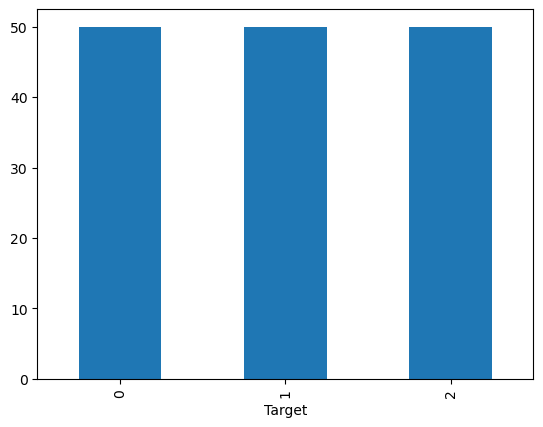

In [30]:
## Checking for distribution in data.

y.value_counts().plot(kind="bar")

- We have equal data in each class.

Text(0.5, 1.0, 'Iris data Correlation Heatmap')

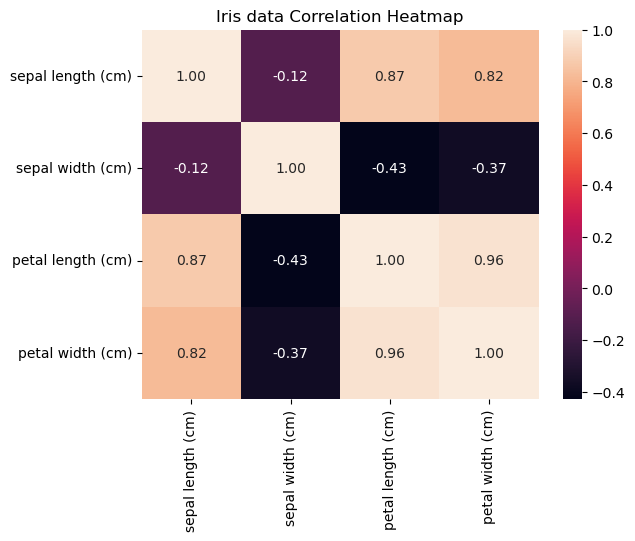

In [33]:
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.title("Iris data Correlation Heatmap")

- We have High Correlation between Petal length and Petal width

Text(0.5, 1.0, 'Iris data Correlation Heatmap')

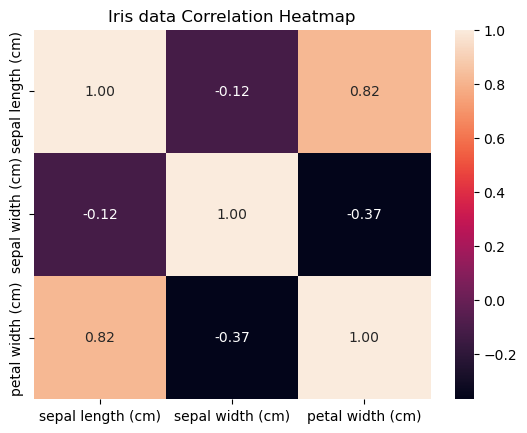

In [62]:
# dropping Petal length as it is high correlated
df = df.drop(columns='petal length (cm)')
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.title("Iris data Correlation Heatmap")

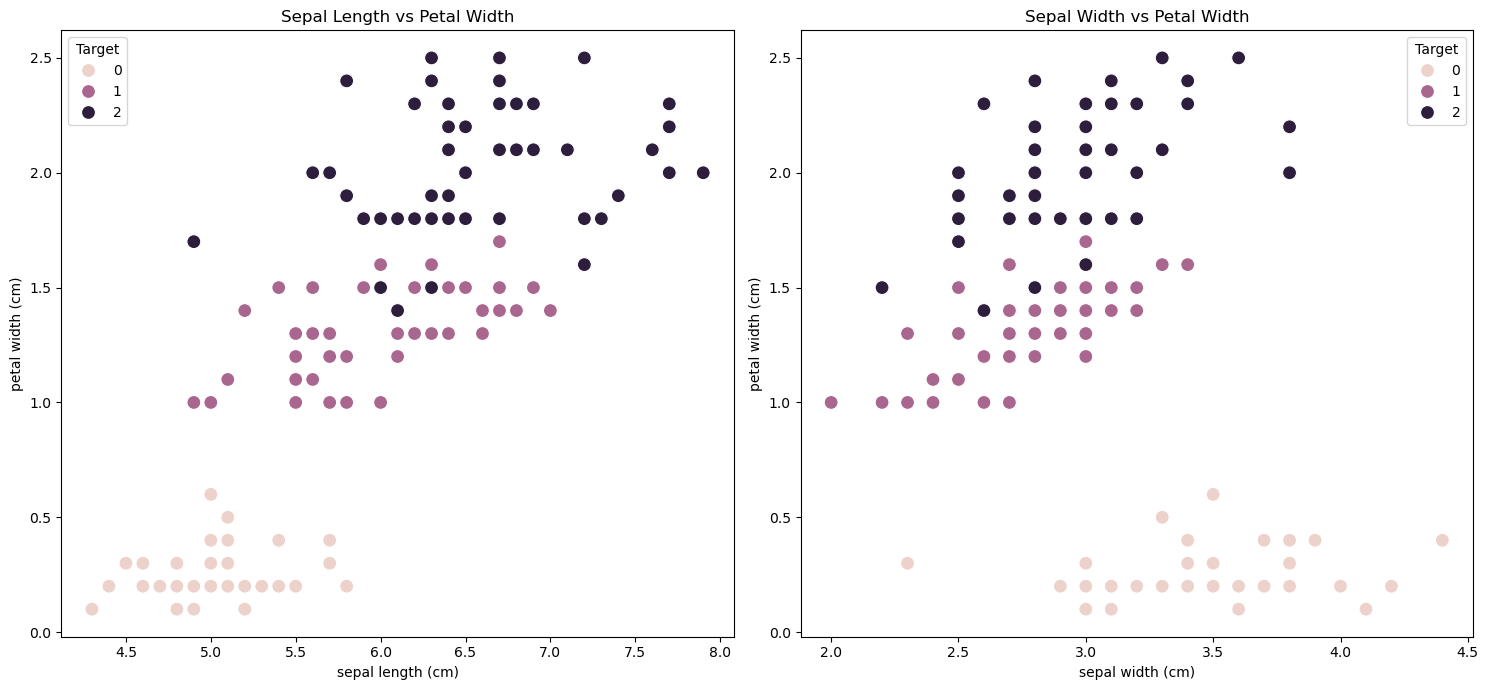

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Scatter plot for sepal length vs petal width
sns.scatterplot(data=df, x='sepal length (cm)', y='petal width (cm)', hue=y, ax=axs[0],s=100)
axs[0].set_title('Sepal Length vs Petal Width')

# Scatter plot for sepal width vs petal width
sns.scatterplot(data=df, x='sepal width (cm)', y='petal width (cm)', hue=y, ax=axs[1], s=100)
axs[1].set_title('Sepal Width vs Petal Width')

plt.tight_layout()
plt.show()


## Creating Decision Tree using GridSearchCV

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

In [71]:
## Creating Train Test
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size=0.2,stratify=None,random_state=42)
X_train.shape, X_test.shape

((120, 3), (30, 3))

In [73]:
param = {
    "criterion" : ["gini","entropy"],
    "max_depth" : np.arange(2,15,2),
    "min_samples_split": [2,3,4],
    "min_samples_leaf" : [1,3,5,10],
}

In [77]:
kf = KFold(n_splits=5)

model = GridSearchCV(estimator=DecisionTreeClassifier(),
                     param_grid=param, 
                     cv=kf,
                     verbose=1,
                     n_jobs=-1,
                    return_train_score=True)

In [79]:
# Trainning best model
model.fit(X_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12, 14]),
                         'min_samples_leaf': [1, 3, 5, 10],
                         'min_samples_split': [2, 3, 4]},
             return_train_score=True, verbose=1)

In [82]:
model.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

## Checking the Accuracy of the Decison tree

In [84]:
from sklearn.metrics import confusion_matrix, classification_report

In [86]:
def plotConfusionMatrix(y_true,y_pred):
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d',
                cmap='Blues', xticklabels=data.target_names,
                yticklabels=data.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

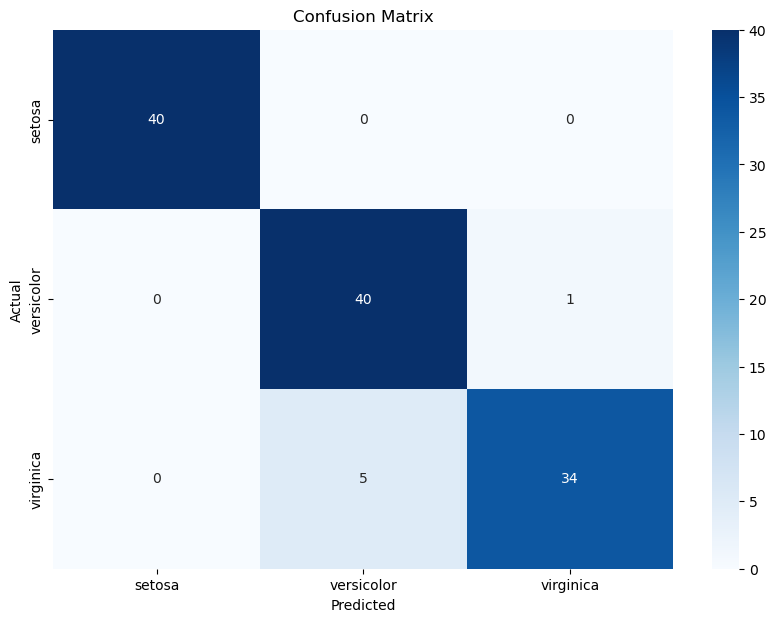

In [88]:
# Testing For Train data
y_train_pred = model.predict(X_train)
plotConfusionMatrix(y_train, y_train_pred)

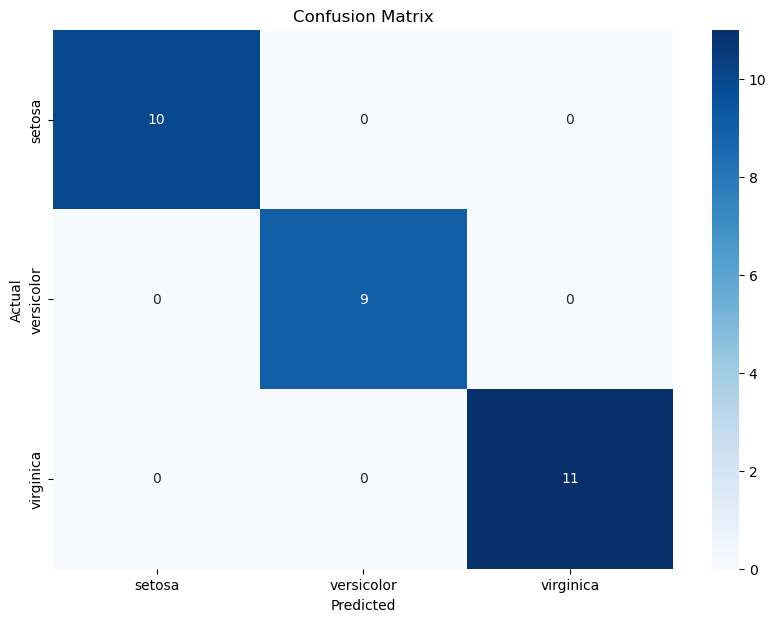

In [90]:
# Testing For Train data
y_pred = model.predict(X_test)
plotConfusionMatrix(y_test, y_pred)

In [96]:
# Classification Report for Train Data
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.89      0.98      0.93        41
           2       0.97      0.87      0.92        39

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



In [94]:
# Classification Report for Test Data
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

